# Split dataset

In [ ]:
# The following code further divides the images of training and annotations
# into test and training dataset
import os, random, shutil

'''

# from fileDir to tarDir
def moveFile(fileDir, tarDir):
    pathDir = os.listdir(fileDir)    
    filenumber=len(pathDir)
    # Proportion of images extracted
    rate=0.1    
    picknumber=int(filenumber*rate) 
    sample = random.sample(pathDir, picknumber)  
    print (sample)
    for name in sample:
            shutil.move(fileDir+name, tarDir+name)
    return



if __name__ == '__main__':

    fileDir = 'D:/DL/ADEChallengeData2016/images/training/'    
    tarDir = 'D:/DL/ADEChallengeData2016/images/test/'    
    annTrain = 'D:/DL/ADEChallengeData2016/annotations/training/'
    annTar = 'D:/DL/ADEChallengeData2016/annotations/test/'
    #moveFile(fileDir, tarDir)

    g = os.walk(r"D:/DL/ADEChallengeData2016/images/test/")

    for path,dir_list,file_list in g:
        for file_name in file_list:
            finalPath = os.path.join(path, file_name)
            #print(finalPath)
            imageName = file_name.replace('jpg' , 'png')
            #print(imageName)
            shutil.move(annTrain+imageName, annTar+imageName)

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
!unzip -uq "drive/My Drive/DL-ADEChallengeData2016.zip" -d "drive/My Drive/DL"
drive.flush_and_unmount()
print("done")
'''

'\n\n# from fileDir to tarDir\ndef moveFile(fileDir, tarDir):\n    pathDir = os.listdir(fileDir)    \n    filenumber=len(pathDir)\n    # Proportion of images extracted\n    rate=0.1    \n    picknumber=int(filenumber*rate) \n    sample = random.sample(pathDir, picknumber)  \n    print (sample)\n    for name in sample:\n            shutil.move(fileDir+name, tarDir+name)\n    return\n\n\n\nif __name__ == \'__main__\':\n\n    fileDir = \'D:/DL/ADEChallengeData2016/images/training/\'    \n    tarDir = \'D:/DL/ADEChallengeData2016/images/test/\'    \n    annTrain = \'D:/DL/ADEChallengeData2016/annotations/training/\'\n    annTar = \'D:/DL/ADEChallengeData2016/annotations/test/\'\n    #moveFile(fileDir, tarDir)\n\n    g = os.walk(r"D:/DL/ADEChallengeData2016/images/test/")\n\n    for path,dir_list,file_list in g:\n        for file_name in file_list:\n            finalPath = os.path.join(path, file_name)\n            #print(finalPath)\n            imageName = file_name.replace(\'jpg\' , \'png

# Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time

from tqdm.notebook import tqdm
import os
import copy
import pandas as pd
import PIL 

from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data
import glob

In [ ]:
folder_path = "drive/My Drive/DL/DL-ADEChallengeData2016/"

In [ ]:
import torch.utils.data as data
import glob
import numpy as np
def get_edge_annotation(img):
  laplacian_kernel = PIL.ImageFilter.Kernel(size=(3, 3), kernel=(0, 1, 0, 1, -4, 1, 0, 1, 0), scale=1, offset=0)
  return img.filter(laplacian_kernel)

class DataLoaderSegmentation(data.Dataset):
    def __init__(self, folder_path, split="training"):
        super(DataLoaderSegmentation, self).__init__()
        self.img_files = sorted(glob.glob(os.path.join(folder_path,'images', split, '*.jpg')))
        self.mask_files =  sorted(glob.glob(os.path.join(folder_path,'annotations', split, '*.png')))

    def __getitem__(self, index):
        img_path = self.img_files[index]
        mask_path = self.mask_files[index]
        image = PIL.Image.open(img_path)
        mask = PIL.Image.open(mask_path)

        image = np.asarray(transforms.Resize([512,512])(image))
        image = transforms.ToTensor()(np.array(image))
        mask = transforms.Resize([512,512])(mask)
        edge_mask = get_edge_annotation(mask)
        mask = np.asarray(mask).astype(np.int64)
        edge_mask = np.asarray(edge_mask).astype(np.int64)
        edge_mask = np.where(edge_mask > 0, 1, 0)
        return image, torch.from_numpy(mask),torch.from_numpy(edge_mask)

    def __len__(self):
        return len(self.img_files)//2
     

In [ ]:
train_data = DataLoaderSegmentation(folder_path)
train_data_loader = DataLoader(train_data, batch_size=4, shuffle=False, num_workers = 16)
print(len(train_data_loader))  
validation_data = DataLoaderSegmentation(folder_path, split="validation")
validation_data_loader = DataLoader(validation_data, batch_size=4, shuffle=False, num_workers = 16)
print(len(validation_data_loader))

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


2273
250


# Show sample images

In [ ]:
img, seg, edge = next(iter(test_data_loader))

In [ ]:
Mask = torch.tensor([
        [120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50], [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
        [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7], [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
        [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3], [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
        [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220], [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
        [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255], [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7],
        [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153], [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255],
        [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0], [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255],
        [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255], [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255],
        [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0], [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0],
        [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255], [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255],
        [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20], [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255],
        [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255], [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255],
        [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0], [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0],
        [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255], [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112],
        [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160], [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163],
        [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0], [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0],
        [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255], [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204],
        [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255], [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255],
        [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194], [102, 255, 0], [92, 0, 255], [30, 180, 120]
])
def visualize_first_n(batch_img, batch_seg, n):
    fig, ax = plt.subplots(1, n, figsize=(20,10))
    i=0
    for ax in ax.ravel():
      # break when no more axes left
      if ax is None:
          break
      ax.imshow(batch_img[i,:,:,:].permute((1,2,0)))
      ax.axis('off')
      ax.set_title('image {}'.format(i+1))
      i += 1

    fig, ax = plt.subplots(1, n, figsize=(20,10))
    i=0
    for ax in ax.ravel():
      if ax is None:
          break
      seg_mask = np.zeros((512,512,3))
      for k in range(512):
        for j  in range(512):
          seg_mask[k,j,:] = Mask[batch_seg[i,k,j].item()]/255.0
      ax.imshow(seg_mask)
      ax.axis('off')
      ax.set_title('annotation {}'.format(i+1))
      i += 1

def vis_with_edge(batch_img, batch_seg, batch_edge, n):
    visualize_first_n(batch_img, batch_seg, n)
    fig, ax = plt.subplots(1, n, figsize=(20,10))
    i=0
    for ax in ax.ravel():
      if ax is None:
          break
      ax.imshow(batch_edge[i,:,:])
      ax.axis('off')
      ax.set_title('edge {}'.format(i+1))
      i += 1    


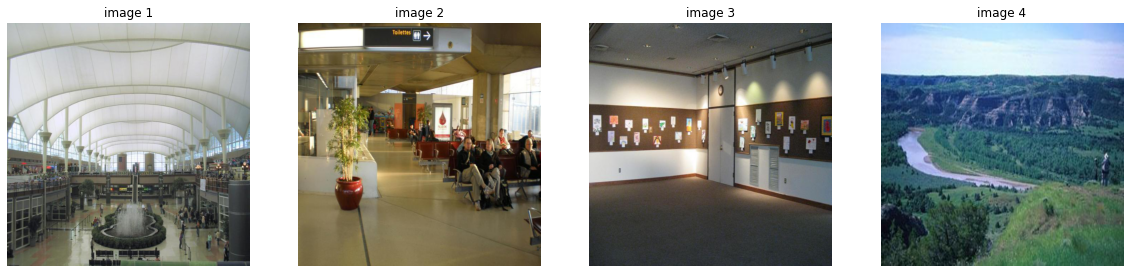

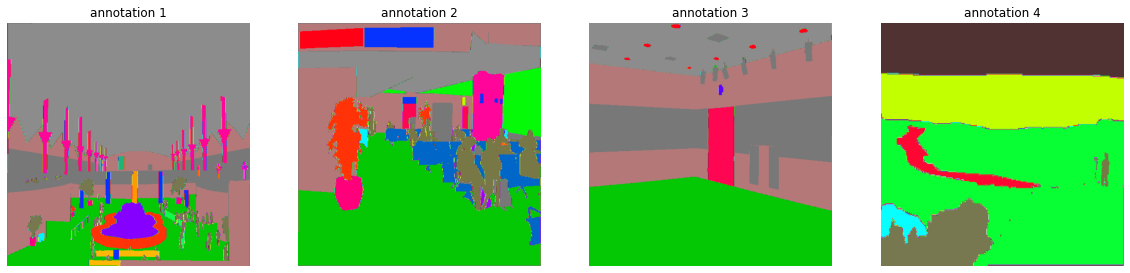

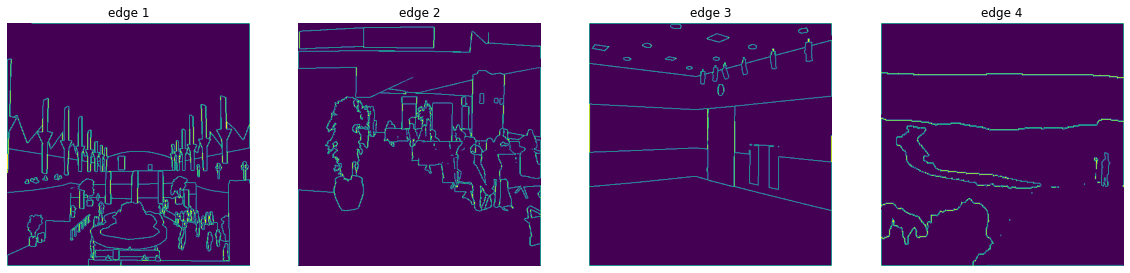

In [ ]:
vis_with_edge(img, seg, edge, 4)

# Model1

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from torch import cat, nn, squeeze
import cv2
import numpy as np
import torchvision
import warnings
warnings.filterwarnings("ignore")

def get_encoder(model, pretrained=True):
    if model == "resnet18":
        encoder = torchvision.models.resnet18(pretrained=pretrained)
    elif model == "resnet34":
        encoder = torchvision.models.resnet34(pretrained=pretrained)
    elif model == "resnet50":
        encoder = torchvision.models.resnet50(pretrained=pretrained)
    elif model == "resnext50":
        encoder = torchvision.models.resnext50_32x4d(pretrained=pretrained)
    elif model == "resnext101":
        encoder = torchvision.models.resnext101_32x8d(pretrained=pretrained)
        
    if model in ["resnet18", "resnet34"]: 
        model = "resnet18-34"
    else: 
        model = "resnet50-101"
        
    filters_dict = {
        "resnet18-34": [512, 512, 256, 128, 64],
        "resnet50-101": [2048, 2048, 1024, 512, 256]
    }

    return encoder, filters_dict[model]


class ConvRelu(nn.Module):
    def __init__(self, in_: int, out: int, activate=True, batch_norm=False):
        super(ConvRelu, self).__init__()
        self.activate = activate
        self.batch_norm = batch_norm
        self.bn = nn.BatchNorm2d(out)
        self.conv = nn.Conv2d(in_, out, 3, padding=1)
        self.activation = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        if self.batch_norm:
            x = self.bn(x)
        if self.activate:
            x = self.activation(x)
        return x

class ResidualBlock(nn.Module):
    
    def __init__(self, in_channels: int, num_filters: int, batch_norm=True):
        super(ResidualBlock, self).__init__()
        self.batch_norm = batch_norm
        self.bn = nn.BatchNorm2d(num_filters)
        self.activation = nn.ReLU(inplace=True)
        self.conv_block = ConvRelu(in_channels, num_filters, activate=True, batch_norm=True)
        self.conv_block_na = ConvRelu(in_channels, num_filters, activate=False, batch_norm=True)
        self.activation = nn.ReLU(inplace=True)
        
    def forward(self, inp):
        x = self.conv_block(inp)
        x = self.conv_block_na(x)
        if self.batch_norm:
            x = self.bn(x)
        x = x.add(inp)
        x = self.activation(x)
        return x

class DecoderBlockResNet(nn.Module):
    def __init__(self, in_channels, middle_channels, out_channels, res_blocks_dec=False):
        super(DecoderBlockResNet, self).__init__()
        self.in_channels = in_channels
        self.res_blocks_dec = res_blocks_dec

        layers_list = [ConvRelu(in_channels, middle_channels, activate=True, batch_norm=False)]
        
        if self.res_blocks_dec:
            layers_list.append(ResidualBlock(middle_channels, middle_channels, batch_norm=True))
        
        layers_list.append(nn.ConvTranspose2d(middle_channels, out_channels, kernel_size=4, stride=2, padding=1))
        if not self.res_blocks_dec:
            layers_list.append(nn.ReLU(inplace=True))
        
        self.block = nn.Sequential(*layers_list)

    def forward(self, x):
        return self.block(x)

class UnetResNetEdge(nn.Module):

    def __init__(self, input_channels=3, num_classes=1, num_filters=32, res_blocks_dec=False,
                 Dropout=.2, encoder_name="resnet34", edge_encoder_name = "resnet18", pretrained=True):
        
        super().__init__()

        self.encoder, self.filters_dict = get_encoder(encoder_name, pretrained)
        self.edge_encoder, self.filters_dict_edge = get_encoder(edge_encoder_name, pretrained)
        self.num_classes = num_classes
        self.Dropout = Dropout
        self.res_blocks_dec = res_blocks_dec
        self.input_channels = input_channels
        
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU(inplace=True)
        self.channel_tuner = nn.Conv2d(1, 3, kernel_size=1)
        
        # build encoder for image
        self.conv1 = nn.Sequential(self.encoder.conv1, self.encoder.bn1, self.encoder.relu, self.pool)
        self.conv2 = self.encoder.layer1
        self.conv3 = self.encoder.layer2
        self.conv4 = self.encoder.layer3
        self.conv5 = self.encoder.layer4

        # build encoder for edge
        self.edge_conv1 = nn.Sequential(self.edge_encoder.conv1, self.edge_encoder.bn1, self.edge_encoder.relu, self.pool)
        self.edge_conv2 = self.edge_encoder.layer1
        self.edge_conv3 = self.edge_encoder.layer2
        self.edge_conv4 = self.edge_encoder.layer3
        self.edge_conv5 = self.edge_encoder.layer4

        self.concat_img_edge = nn.Conv2d(512, 256, kernel_size=1)
        
        # build decoder blocks
        self.center = DecoderBlockResNet(self.filters_dict[0], num_filters * 8 * 2, 
                                         num_filters * 8, res_blocks_dec=False)
        self.dec5 = DecoderBlockResNet(self.filters_dict[1] + num_filters * 8, 
                                       num_filters * 8 * 2, num_filters * 8, res_blocks_dec=self.res_blocks_dec)    
        self.dec4 = DecoderBlockResNet(self.filters_dict[2] + num_filters * 8, 
                                       num_filters * 8 * 2, num_filters * 8, res_blocks_dec=self.res_blocks_dec)
        self.dec3 = DecoderBlockResNet(self.filters_dict[3] + num_filters * 8, 
                                       num_filters * 4 * 2, num_filters * 2, res_blocks_dec=self.res_blocks_dec)
        self.dec2 = DecoderBlockResNet(self.filters_dict[4] + num_filters * 2, 
                                       num_filters * 2 * 2, num_filters * 2 * 2, res_blocks_dec=self.res_blocks_dec)
        
        self.dec1 = DecoderBlockResNet(num_filters * 2 * 2, num_filters * 2 * 2, num_filters, res_blocks_dec=False)
        self.dec0 = ConvRelu(num_filters, num_filters)

        # dropout layers
        self.dropout_2d = nn.Dropout2d(p=self.Dropout)
        self.edge_dropout_2d = nn.Dropout2d(p=self.Dropout)

        # the output layer for seg
        self.final_seg = nn.Conv2d(num_filters, num_classes, kernel_size=3, padding=1)
        
        # the output layer for edge
        self.final_edge = nn.Conv2d(num_filters, num_classes, kernel_size=3, padding=1)

        # the final output layer
        self.final = nn.Conv2d(num_classes + num_classes, num_classes, kernel_size = 3, padding = 1)
        

    def forward(self, x, z=None):
        
        # encode image
        conv1 = self.conv1(x)
        # print("conv1: ", conv1.shape) conv1:  torch.Size([2, 64, 128, 128])
        conv2 = self.dropout_2d(self.conv2(conv1))
        # print("conv2: ", conv2.shape) conv2:  torch.Size([2, 64, 128, 128])
        conv3 = self.dropout_2d(self.conv3(conv2))
        # print("conv3: ", conv3.shape) conv3:  torch.Size([2, 128, 64, 64])
        conv4 = self.dropout_2d(self.conv4(conv3))
        conv5 = self.dropout_2d(self.conv5(conv4))
        center = self.center(self.pool(conv5))
        center_edge = self.center(self.pool(self.edge_dropout_2d(self.edge_conv5(self.edge_dropout_2d(self.edge_conv4(self.edge_dropout_2d(self.edge_conv3(self.edge_dropout_2d(self.edge_conv2(self.edge_conv1(x)))))))))))

        # concatenate image and edge features into the bottleneck layer
        # f_repeat = torch.cat([torch.empty((1,1,)+(center.size()[2:])).fill_(center_edge[i]) for i in range(z.size()[0])])
        center = torch.cat([center, center_edge], 1)
        center = self.concat_img_edge(center)
        

        # decoder 
        dec5 = self.dec5(cat([center, conv5], 1))
        dec4 = self.dec4(cat([dec5, conv4], 1))
        dec3 = self.dec3(cat([dec4, conv3], 1))
        dec2 = self.dec2(cat([dec3, conv2], 1))
        dec2 = self.dropout_2d(dec2)

        dec1 = self.dec1(dec2)
        dec0 = self.dec0(dec1) 
        # print("dec0: ", dec0.shape) dec0:  torch.Size([2, 32, 512, 512])

        # output edge prediction
        edge_pred = self.final_edge(dec0)
        # print("edge_pred: ", edge_pred.shape) edge_pred:  torch.Size([bs, 151, 512, 512])

        # concatenate seg prediction and edge prediction
        combined_cat = torch.cat([edge_pred, self.final_seg(dec0)], 1)
        # print("combined_cat: ", combined_cat.shape) combined_cat:  torch.Size([bs, 232, 512, 512])

        return self.final(combined_cat), edge_pred # (torch.Size([bs, 151, 512, 512]), torch.Size([bs, 151, 512, 512]))

In [ ]:
class SegLossEdgeAttention(nn.Module):
    def __init__(self, num_classes, mode='train', edge_weight=0.3, seg_weight=0.7, edge_class_weight=0.001):
        super(SegLossEdgeAttention, self).__init__()
        w = np.ones(shape=151)
        w[0] = edge_class_weight
        self.class_weight = torch.tensor(w, dtype=torch.float)
        self.num_classes = num_classes
        self.seg_loss = torch.nn.CrossEntropyLoss() # softmax with crossentropy
        self.edge_loss = torch.nn.CrossEntropyLoss(weight=self.class_weight) #torch.nn.BCEWithLogitsLoss() # sigmoid with crossentropy

        self.edge_weight = edge_weight
        self.seg_weight = seg_weight

    def forward(self, inputs, targets):
        seg_in, edge_in = inputs
        seg_mask, edge_mask = targets
        losses = {}

        losses['seg_loss'] = self.seg_weight * self.seg_loss(seg_in, seg_mask.long())
        losses['edge_loss'] = self.edge_weight * self.edge_loss(edge_in, edge_mask.long())

        return losses
     

In [ ]:

class AverageMeter(object):
    def __init__(self):
        self.initialized = False
        self.val = None
        self.avg = None
        self.sum = None
        self.count = None

    def initialize(self, val, weight):
        self.val = val
        self.avg = val
        self.sum = val * weight
        self.count = weight
        self.initialized = True

    def update(self, val, weight=1):
        if not self.initialized:
            self.initialize(val, weight)
        else:
            self.add(val, weight)

    def add(self, val, weight):
        self.val = val
        self.sum += val * weight
        self.count += weight
        self.avg = self.sum / self.count

    def value(self):
        return self.val

    def average(self):
        return self.avg

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = UnetResNetEdge(encoder_name="resnet34", edge_encoder_name = "resnet18",
                           num_classes=151, 
                           input_channels=3, 
                           num_filters=32, 
                           Dropout=0.3).to(device)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
num_classes = 151
edge_weight = 0.4
seg_weight = 1
best_loss = 1000
# initialize our defined seg loss
loss_function = SegLossEdgeAttention(num_classes, mode='train', edge_weight=edge_weight, seg_weight=seg_weight).to(device)
# initialize an optimizer


learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), learning_rate)

def adjust_learning_rate(optimizer, epoch, learning_rate):
    learning_rate = learning_rate * (0.1 ** (epoch // 30))
    for param_group in optimizer.param_groups:
        param_group['lr'] = learning_rate

In [ ]:
epoch_save_train_inf_for_colab = 1 
save_model_path_colab = "/content/drive/My Drive/DL/latest_model_B/"

In [ ]:
train_loss = []
validation_loss = []
num_epoch = 40
torch.cuda.empty_cache()

for epoch in range(num_epoch):
    adjust_learning_rate(optimizer, epoch, learning_rate)
    print("-" * num_epoch)
    print(f"epoch {epoch + 1}/{num_epoch}")
    model.train()

    train_main_loss = AverageMeter()
    curr_iter = 0#curr_epoch * len(train_loader)

    batches = tqdm(train_data_loader, total=len(train_data_loader))
    for inputs, mask, edge in batches:
        inputs = inputs.type(torch.cuda.FloatTensor).to(device)
        mask = mask.type(torch.cuda.FloatTensor).to(device)
        edge = edge.type(torch.cuda.FloatTensor).to(device)

        optimizer.zero_grad()

        seg_out, mask_out = model(inputs)
        loss = loss_function((seg_out, mask_out), (mask, edge))
        main_loss = loss['seg_loss']
        main_loss += loss['edge_loss']

        main_loss.backward()
        optimizer.step()
        train_main_loss.update(main_loss.item())
                
        curr_iter += 1
    train_loss.append(train_main_loss.avg)
    print(f"epoch {epoch + 1} average loss: {train_main_loss.avg:.4f}")

    model.eval()
    with torch.no_grad():
        val_loss = AverageMeter()
        iou_acc = 0

        batches = tqdm(validation_data_loader, total=len(validation_data_loader))

        for inputs, mask, edge in batches:

            inputs = inputs.type(torch.cuda.FloatTensor).to(device)
            mask = mask.type(torch.cuda.FloatTensor).to(device)
            edge = edge.type(torch.cuda.FloatTensor).to(device)

            with torch.no_grad():
                seg_out, mask_out = model(inputs)

            loss = loss_function((seg_out, mask_out), (mask, edge))
            main_loss = loss['seg_loss']
            main_loss += loss['edge_loss']

            val_loss.update(main_loss.item())
        validation_loss.append(val_loss.avg)      
        print(f"epoch {epoch + 1} average loss: {val_loss.avg:.4f}")

    # save the model if it has improvement
    if val_loss.avg < best_loss:
      model_name = f"/content/drive/MyDrive/DL/unet_multi_edge_model.pth"
      torch.save(model.state_dict(), model_name)
      print(f"Save {model_name}!")
      best_loss = val_loss.avg

    if epoch > 30:
        epoch_save_train_inf_for_colab = 1
    if epoch % epoch_save_train_inf_for_colab == int(epoch_save_train_inf_for_colab-1):
            # 保存训练进度
        state = { 
                    'model': model.state_dict(), 
                    'optimizer':optimizer.state_dict(),
                    'epoch': epoch, 
                    'validation_loss':validation_loss,
                    'best_loss':best_loss,
                 
                    'train_main_loss':train_main_loss,
                    'train_loss':train_loss
                    }
        # save_model_path_colab="/content/drive/My Drive/colab notebooks/output/"   
        # save_model_path_colab_new=os.path.join(save_model_path_colab,
        #                                         f'{epoch}_{i:06}_loss{loss}.pt')
        torch.save(state,save_model_path_colab+"unet_multi_edge_model.pth")
        print('save train model at ', save_model_path_colab+"unet_multi_edge_model.pth","from colab")
  

----------------------------------------
epoch 1/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 1 average loss: 3.3880


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 1 average loss: 2.9256
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
----------------------------------------
epoch 2/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 2 average loss: 2.8483


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 2 average loss: 2.7331
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 3/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 3 average loss: 2.6927


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 3 average loss: 2.6104
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
----------------------------------------
epoch 4/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 4 average loss: 2.5887


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 4 average loss: 2.4935
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 5/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 5 average loss: 2.4936


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 5 average loss: 2.5031
----------------------------------------
epoch 6/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 6 average loss: 2.4237


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 6 average loss: 2.4216
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 7/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 7 average loss: 2.3641


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 7 average loss: 2.3598
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
----------------------------------------
epoch 8/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 8 average loss: 2.3057


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 8 average loss: 2.3051
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 9/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 9 average loss: 2.2645


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 9 average loss: 2.2602
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
----------------------------------------
epoch 10/40


  0%|          | 0/2273 [00:00<?, ?it/s]

## Reload model 1

In [ ]:
### modifier 3 读取载入之前colab训练好的参数，权重

save_model_path_colab = "/content/drive/My Drive/DL/latest_model_B/"
save_path = save_model_path_colab + "unet_multi_edge_model.pth"
checkpoint = torch.load(save_path)
model.load_state_dict(checkpoint['model'])
optimizer.load_state_dict(checkpoint['optimizer'])
start_epoch = checkpoint['epoch']

validation_loss  = checkpoint['validation_loss']
best_loss = checkpoint['best_loss']
train_main_loss = checkpoint['train_main_loss']
train_loss = checkpoint['train_loss']

print("Finish epoch turn: {}, Epoch index: {}".format(start_epoch+1,start_epoch))


Finish epoch turn: 8, Epoch index: 7


In [ ]:
num_epoch = 40
torch.cuda.empty_cache()

epoch_save_train_inf_for_colab = 2  # 每隔多少次epoch 从colab上保存训练信息

for epoch in range(start_epoch+1,num_epoch):
    adjust_learning_rate(optimizer, epoch, learning_rate)
    print("-" * num_epoch)
    print(f"epoch {epoch + 1}/{num_epoch}")
    model.train()

    train_main_loss = AverageMeter()
    curr_iter = 0#curr_epoch * len(train_loader)

    batches = tqdm(train_data_loader, total=len(train_data_loader))
    for inputs, mask, edge in batches:
        inputs = inputs.type(torch.cuda.FloatTensor).to(device)
        mask = mask.type(torch.cuda.FloatTensor).to(device)
        edge = edge.type(torch.cuda.FloatTensor).to(device)

        optimizer.zero_grad()

        seg_out, mask_out = model(inputs)
        loss = loss_function((seg_out, mask_out), (mask, edge))
        main_loss = loss['seg_loss']
        main_loss += loss['edge_loss']

        main_loss.backward()
        optimizer.step()
        train_main_loss.update(main_loss.item())
                
        curr_iter += 1
    train_loss.append(train_main_loss.avg)
    print(f"epoch {epoch + 1} average loss: {train_main_loss.avg:.4f}")

    model.eval()
    with torch.no_grad():
        val_loss = AverageMeter()
        iou_acc = 0

        batches = tqdm(validation_data_loader, total=len(validation_data_loader))

        for inputs, mask, edge in batches:

            inputs = inputs.type(torch.cuda.FloatTensor).to(device)
            mask = mask.type(torch.cuda.FloatTensor).to(device)
            edge = edge.type(torch.cuda.FloatTensor).to(device)

            with torch.no_grad():
                seg_out, mask_out = model(inputs)

            loss = loss_function((seg_out, mask_out), (mask, edge))
            main_loss = loss['seg_loss']
            main_loss += loss['edge_loss']

            val_loss.update(main_loss.item())
        validation_loss.append(val_loss.avg)      
        print(f"epoch {epoch + 1} average loss: {val_loss.avg:.4f}")

    # save the model if it has improvement
    if val_loss.avg < best_loss:
      model_name = f"/content/drive/MyDrive/DL/unet_multi_edge_model.pth"
      torch.save(model.state_dict(), model_name)
      print(f"Save {model_name}!")
      best_loss = val_loss.avg

    if epoch > 30:
        epoch_save_train_inf_for_colab = 2
    if epoch % epoch_save_train_inf_for_colab == int(epoch_save_train_inf_for_colab-1):
            # 保存训练进度
        state = { 
                    'model': model.state_dict(), 
                    'optimizer':optimizer.state_dict(),
                    'epoch': epoch, 
                    'validation_loss':validation_loss,
                    'best_loss':best_loss,
                 
                    'train_main_loss':train_main_loss,
                    'train_loss':train_loss
                    }
        # save_model_path_colab="/content/drive/My Drive/colab notebooks/output/"   
        # save_model_path_colab_new=os.path.join(save_model_path_colab,
        #                                         f'{epoch}_{i:06}_loss{loss}.pt')
        torch.save(state,save_model_path_colab+"unet_multi_edge_model.pth")
        print('save train model at ', save_model_path_colab+"unet_multi_edge_model.pth","from colab")
  

----------------------------------------
epoch 9/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 9 average loss: 2.2578


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 9 average loss: 2.2451
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
----------------------------------------
epoch 10/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 10 average loss: 2.2194


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 10 average loss: 2.1788
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 11/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 11 average loss: 2.1819


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 11 average loss: 2.1915
----------------------------------------
epoch 12/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 12 average loss: 2.1576


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 12 average loss: 2.2861
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 13/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 13 average loss: 2.1311


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 13 average loss: 2.1766
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
----------------------------------------
epoch 14/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 14 average loss: 2.0973


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 14 average loss: 2.1783
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 15/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 15 average loss: 2.0769


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 15 average loss: 2.0957
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
----------------------------------------
epoch 16/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 16 average loss: 2.0504


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 16 average loss: 2.1529
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 17/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 17 average loss: 2.0295


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 17 average loss: 2.1059
----------------------------------------
epoch 18/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 18 average loss: 2.0078


  0%|          | 0/250 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f07080f4040>Exception ignored in: Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f07080f4040>Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f07080f4040>
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Exception ignored in: 
    self._shutdown_workers()Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f07080f4040>
Traceback (most recent call last):
Traceback (most recent call last):

      File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
  File "/usr/local/lib/python3.8/dist-packages/to

epoch 18 average loss: 2.0739
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 19/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 19 average loss: 1.9887


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 19 average loss: 2.1119
----------------------------------------
epoch 20/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 20 average loss: 1.9699


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 20 average loss: 2.0805
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 21/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 21 average loss: 1.9416


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 21 average loss: 2.0825
----------------------------------------
epoch 22/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 22 average loss: 1.9316


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 22 average loss: 2.0597
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 23/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 23 average loss: 1.9139


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 23 average loss: 2.0763
----------------------------------------
epoch 24/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 24 average loss: 1.8949


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 24 average loss: 2.0748
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 25/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 25 average loss: 1.8771


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 25 average loss: 2.0488
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
----------------------------------------
epoch 26/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 26 average loss: 1.8534


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 26 average loss: 1.9951
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 27/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 27 average loss: 1.8371


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 27 average loss: 2.0138
----------------------------------------
epoch 28/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 28 average loss: 1.8253


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 28 average loss: 1.9479
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 29/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 29 average loss: 1.8112


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 29 average loss: 2.0379
----------------------------------------
epoch 30/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 30 average loss: 1.7951


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 30 average loss: 1.9805
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 31/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 31 average loss: 1.6171


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 31 average loss: 1.8500
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
----------------------------------------
epoch 32/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 32 average loss: 1.5748


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 32 average loss: 1.8358
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 33/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 33 average loss: 1.5541


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 33 average loss: 1.8268
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
----------------------------------------
epoch 34/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 34 average loss: 1.5401


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 34 average loss: 1.8321
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 35/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 35 average loss: 1.5253


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 35 average loss: 1.8316
----------------------------------------
epoch 36/40


  0%|          | 0/2273 [00:00<?, ?it/s]

# Reload model 1

In [ ]:
### modifier 3 读取载入之前colab训练好的参数，权重

save_model_path_colab = "/content/drive/My Drive/DL/latest_model_B/"
save_path = save_model_path_colab + "unet_multi_edge_model.pth"
checkpoint = torch.load(save_path)
model.load_state_dict(checkpoint['model'])
optimizer.load_state_dict(checkpoint['optimizer'])
start_epoch = checkpoint['epoch']

validation_loss  = checkpoint['validation_loss']
best_loss = checkpoint['best_loss']
train_main_loss = checkpoint['train_main_loss']
train_loss = checkpoint['train_loss']

print("Finish epoch turn: {}, Epoch index: {}".format(start_epoch+1,start_epoch))


Finish epoch turn: 34, Epoch index: 33


In [ ]:
num_epoch = 40
torch.cuda.empty_cache()

epoch_save_train_inf_for_colab = 2  # 每隔多少次epoch 从colab上保存训练信息

for epoch in range(start_epoch+1,num_epoch):
    adjust_learning_rate(optimizer, epoch, learning_rate)
    print("-" * num_epoch)
    print(f"epoch {epoch + 1}/{num_epoch}")
    model.train()

    train_main_loss = AverageMeter()
    curr_iter = 0#curr_epoch * len(train_loader)

    batches = tqdm(train_data_loader, total=len(train_data_loader))
    for inputs, mask, edge in batches:
        inputs = inputs.type(torch.cuda.FloatTensor).to(device)
        mask = mask.type(torch.cuda.FloatTensor).to(device)
        edge = edge.type(torch.cuda.FloatTensor).to(device)

        optimizer.zero_grad()

        seg_out, mask_out = model(inputs)
        loss = loss_function((seg_out, mask_out), (mask, edge))
        main_loss = loss['seg_loss']
        main_loss += loss['edge_loss']

        main_loss.backward()
        optimizer.step()
        train_main_loss.update(main_loss.item())
                
        curr_iter += 1
    train_loss.append(train_main_loss.avg)
    print(f"epoch {epoch + 1} average loss: {train_main_loss.avg:.4f}")

    model.eval()
    with torch.no_grad():
        val_loss = AverageMeter()
        iou_acc = 0

        batches = tqdm(validation_data_loader, total=len(validation_data_loader))

        for inputs, mask, edge in batches:

            inputs = inputs.type(torch.cuda.FloatTensor).to(device)
            mask = mask.type(torch.cuda.FloatTensor).to(device)
            edge = edge.type(torch.cuda.FloatTensor).to(device)

            with torch.no_grad():
                seg_out, mask_out = model(inputs)

            loss = loss_function((seg_out, mask_out), (mask, edge))
            main_loss = loss['seg_loss']
            main_loss += loss['edge_loss']

            val_loss.update(main_loss.item())
        validation_loss.append(val_loss.avg)      
        print(f"epoch {epoch + 1} average loss: {val_loss.avg:.4f}")

    # save the model if it has improvement
    if val_loss.avg < best_loss:
      model_name = f"/content/drive/MyDrive/DL/unet_multi_edge_model.pth"
      torch.save(model.state_dict(), model_name)
      print(f"Save {model_name}!")
      best_loss = val_loss.avg

    if epoch > 30:
        state = { 
                    'model': model.state_dict(), 
                    'optimizer':optimizer.state_dict(),
                    'epoch': epoch, 
                    'validation_loss':validation_loss,
                    'best_loss':best_loss,
                 
                    'train_main_loss':train_main_loss,
                    'train_loss':train_loss
                    }
        # save_model_path_colab="/content/drive/My Drive/colab notebooks/output/"   
        # save_model_path_colab_new=os.path.join(save_model_path_colab,
        #                                         f'{epoch}_{i:06}_loss{loss}.pt')
        torch.save(state,save_model_path_colab+"unet_multi_edge_model.pth")
        print('save train model at ', save_model_path_colab+"unet_multi_edge_model.pth","from colab")
  

----------------------------------------
epoch 35/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 35 average loss: 1.5264


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 35 average loss: 1.8221
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 36/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 36 average loss: 1.5179


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 36 average loss: 1.8145
Save /content/drive/MyDrive/DL/unet_multi_edge_model.pth!
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 37/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 37 average loss: 1.5060


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 37 average loss: 1.8286
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 38/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 38 average loss: 1.4998


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 38 average loss: 1.8283
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 39/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 39 average loss: 1.4891


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 39 average loss: 1.8280
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab
----------------------------------------
epoch 40/40


  0%|          | 0/2273 [00:00<?, ?it/s]

epoch 40 average loss: 1.4858


  0%|          | 0/250 [00:00<?, ?it/s]

epoch 40 average loss: 1.8359
save train model at  /content/drive/My Drive/DL/latest_model_B/unet_multi_edge_model.pth from colab


##Results

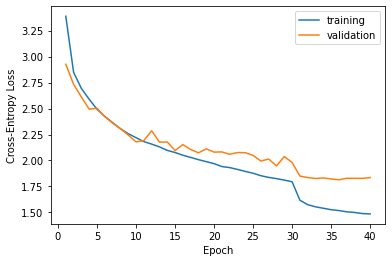

In [ ]:
# plot training loss and validation loss
import matplotlib.pyplot as plt
def plot_train_val_loss(epoch_loss_values, val_loss_values, file_name):
    plt.plot(np.arange(len(epoch_loss_values))+1, epoch_loss_values, label = "training")
    plt.xlabel("Epoch")
    # plt.ylabel("Training Cross-Entropy Loss")
    plt.plot(np.arange(len(val_loss_values))+1, val_loss_values, label = "validation")
    plt.xlabel("Epoch")
    plt.ylabel("Cross-Entropy Loss")
    # plt.title("Validation")
    plt.legend()
    plt.savefig(fname = file_name)

plot_train_val_loss(train_loss, validation_loss, "drive/My Drive/DL/latest_model_B/model_B")

In [ ]:
model.load_state_dict(torch.load("drive/My Drive/DL/unet_multi_edge_model.pth"))
model.to(device)

UnetResNetEdge(
  (encoder): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [ ]:
test_data = DataLoaderSegmentation(folder_path, split="test")
test_data_loader = DataLoader(test_data, batch_size=8, shuffle=False, num_workers = 4)


In [ ]:
img, mask, edge = next(iter(test_data_loader))

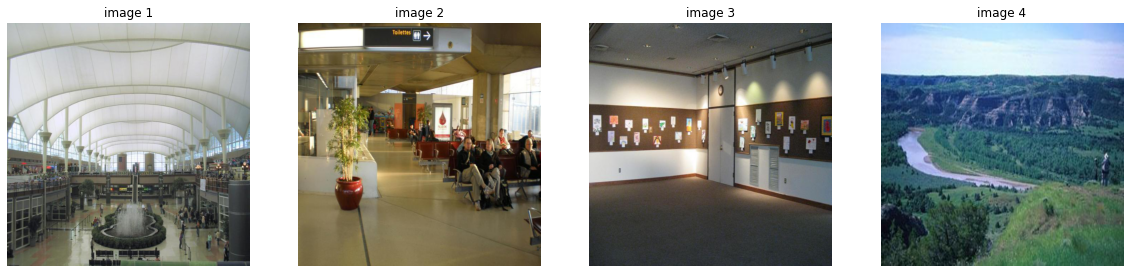

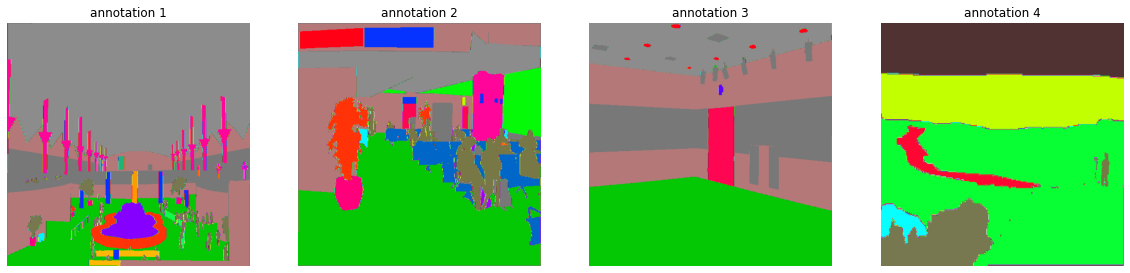

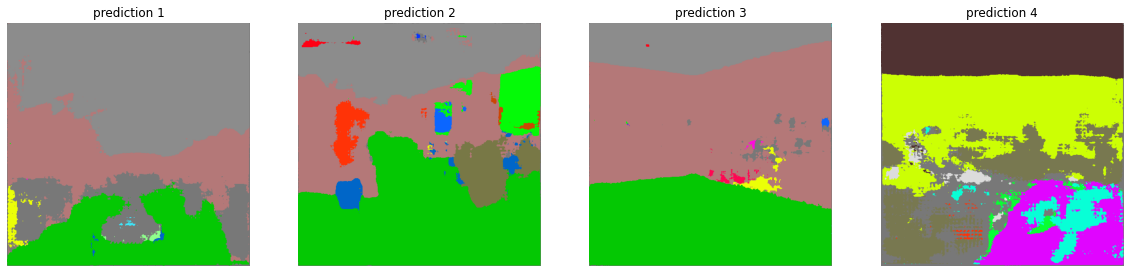

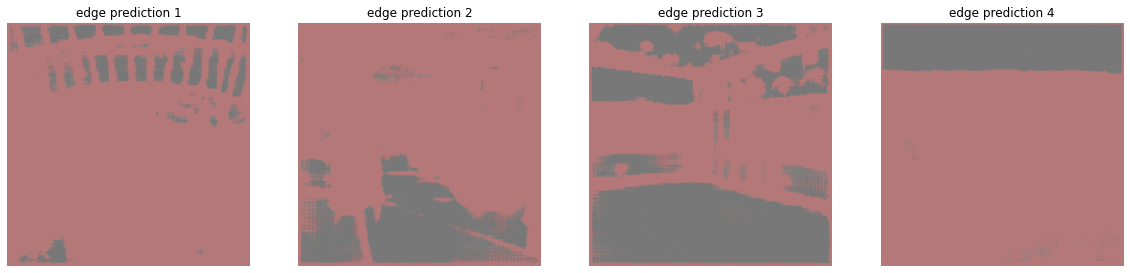

In [ ]:
def visualize_prediction_edge_n(batch_img, batch_seg, n, model):
  visualize_first_n(batch_img,batch_seg,n)
  fig, ax = plt.subplots(1, n, figsize=(20,10))
  model.eval()
  with torch.no_grad():
    prediction_raw, edge_raw = model(batch_img.to(device))
    prediction = np.argmax(prediction_raw.cpu(), axis = 1)
    edge_pred = np.argmax(edge_raw.cpu(), axis = 1)#torch.detach(edge_raw).cpu().numpy()
    ax = ax.ravel()
    for i in range(n):
      pre_mask = np.zeros((512,512,3))
      for k in range(512):
        for j  in range(512):
          pre_mask[k,j,:] = Mask[prediction[i,k,j].item()]/255.0
      ax[i].imshow(pre_mask)
      ax[i].axis('off')
      ax[i].set_title('prediction {}'.format(i+1))
    fig, ax = plt.subplots(1, n, figsize=(20,10))
    ax = ax.ravel()
    for i in range(n):
      edge_mask = np.zeros((512, 512, 3))
      for k in range(512):
        for j  in range(512):
          edge_mask[k,j,:] = Mask[edge_pred[i,k,j].item()]/255.0
        
      ax[i].imshow(edge_mask)
      ax[i].axis('off')
      ax[i].set_title('edge prediction {}'.format(i+1))
visualize_prediction_edge_n(img, mask, 4, model)
 

In [ ]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.initialized = False
        self.val = None
        self.avg = None
        self.sum = None
        self.count = None

    def initialize(self, val, weight):
        self.val = val
        self.avg = val
        self.sum = val * weight
        self.count = weight
        self.initialized = True

    def update(self, val, weight=1):
        if not self.initialized:
            self.initialize(val, weight)
        else:
            self.add(val, weight)

    def add(self, val, weight):
        self.val = val
        self.sum += val * weight
        self.count += weight
        self.avg = self.sum / self.count

    def value(self):
        return self.val

    def average(self):
        return self.avg

In [ ]:
def intersectionAndUnion(imPred, imLab, numClass):
    imPred = np.asarray(imPred).copy()
    imLab = np.asarray(imLab).copy()

    imPred += 1
    imLab += 1
    # Remove classes from unlabeled pixels in gt image.
    # We should not penalize detections in unlabeled portions of the image.
    imPred = imPred * (imLab > 0)

    # Compute area intersection:
    intersection = imPred * (imPred == imLab)
    (area_intersection, _) = np.histogram(
        intersection, bins=numClass, range=(1, numClass))

    # Compute area union:
    (area_pred, _) = np.histogram(imPred, bins=numClass, range=(1, numClass))
    (area_lab, _) = np.histogram(imLab, bins=numClass, range=(1, numClass))
    area_union = area_pred + area_lab - area_intersection

    return (area_intersection, area_union)
     

In [ ]:
fileobj = open("drive/My Drive/DL/objectInfo150.txt")
line = fileobj.readline()
weightclass = [0.0725]
line = fileobj.readline()
while line: 
    for i in range(len(line)):
        if line[i] == "\t":
            tmp = line[i+1:i+7]
            weight_i = float(tmp)
            weightclass.append(weight_i)
            break            
    line = fileobj.readline()
weightclass = np.array(weightclass)

In [ ]:
def accuracy(preds, label):
    valid = (label >= 0)
    acc_sum = (valid * (preds == label)).sum()
    valid_sum = valid.sum()
    acc = float(acc_sum) / (valid_sum + 1e-10)
    return acc, valid_sum
def evaluate(segmentation_module, loader, weightclass):
    acc_meter = AverageMeter()
    intersection_meter = AverageMeter()
    union_meter = AverageMeter()
    intersection_meter_50 = AverageMeter()
    union_meter_50 = AverageMeter()

    segmentation_module.eval()

    for img, seg, edge in tqdm(validation_data_loader):
        # get the prediction here
        pred, edge = segmentation_module(img.to(device))
        pred = pred.detach().cpu()
        pred = np.argmax(pred, axis = 1)

        # calculate accuracy
        acc, pix = accuracy(pred, seg)
        intersection, union = intersectionAndUnion(pred, seg, 151)
        acc_meter.update(acc, pix)
        intersection_meter.update(intersection)
        union_meter.update(union)
        intersection_meter_50.update(intersection[0:50])
        union_meter_50.update(union[0:50])
    iou = intersection_meter.sum / (union_meter.sum + 1e-10)
    iou_50 = intersection_meter_50.sum / (union_meter_50.sum + 1e-10)
    wiou = weightclass*np.array(iou)
    f= open("drive/My Drive/DL/latest_model_B/iou_baseline.txt","w+")
    for i, _iou in enumerate(iou):
      print('class [{}], IoU: {:.4f}'.format(i, _iou))
      f.write('{}, {:.4f}'.format(i, _iou))
      f.write('\n')

    f.write('[Eval Summary]:')
    f.write('Mean IoU: {:.4f}, Mean IoU first 50 classes: {:.4f}, Weighted IoU: {:.4f}, Accuracy: {:.4f}%'
          .format(iou.mean(), iou_50.mean(), np.sum(wiou), acc_meter.average()*100))

evaluate(model, validation_data_loader, weightclass)

In [ ]:
def multi_acc(pred, label):
    pred = np.argmax(pred, axis = 1)
    corrects = (pred == label).float()
    acc = corrects.sum() / corrects.numel()
    acc = acc * 100
    return acc
     

In [ ]:

def evaluate_model(model, val_loader, eval_func):
  model.eval()
  step = len(val_loader)
  acc = []
  with torch.no_grad():
    for img, seg, mask in tqdm(val_loader):
      img = img.to(device)
      prediction_raw, edge_raw = model(img)
      acc.append(eval_func(prediction_raw.cpu(), seg))
  return np.mean(acc)